In [19]:
from phidl import Device
from phidl import quickplot as qp
import phidl.geometry as pg

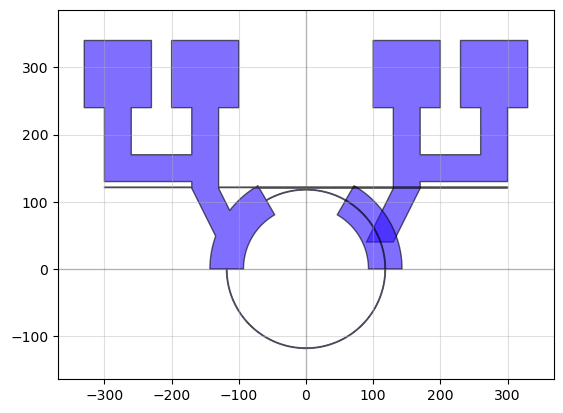

In [20]:
D = Device()
R =D << pg.ring(radius = 118, width = 0.8, angle_resolution = 2.5, layer = 0)
Bus = D << pg.rectangle(size = (600,0.8), layer = 0)
Bus.move([-300,121])
A = D << pg.arc(radius = 118, width = 50, theta = 60, layer = 1)
xpts = [130, 130, 100, 100, 200, 200, 170, 170, 260, 260, 230, 230, 330, 330, 300, 300, 170, 170, 130, 90]
ypts = [120, 240, 240, 340, 340, 240, 240,170, 170, 240, 240, 340, 340, 240, 240, 130, 130, 120, 40, 40]
B = D.add_polygon([xpts, ypts], layer = 1)
part1 = D << pg.union(D, by_layer = False, layer = 1)
part2 = part1.mirror(p1 = [0,0], p2 = [0,350])
layer_0 = pg.extract(D, layers = [1])
qp(layer_0)

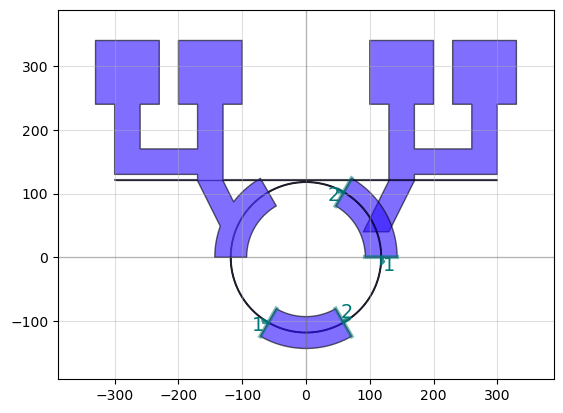

In [21]:
C = D.add_ref(pg.arc(radius = 118, width = 50, theta = 60, layer = 1))
C.rotate(-120)
qp(D)

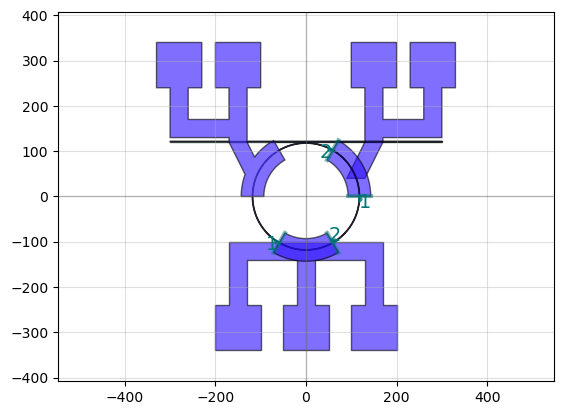

In [22]:
xpts1 = [-170, -170, -200, -200, -100, -100, -130, -130, -20, -20, -50, -50, 50, 50, 20, 20, 130, 130, 100, 100, 200, 200, 170, 170]
ypts1 = [-100, -240, -240, -340, -340, -240, -240, -140, -140, -240, -240, -340, -340, -240, -240, -140, -140, -240, -240, -340, -340, -240, -240, -100]
part3 = D.add_polygon([xpts1, ypts1], layer = 1)
qp(D)

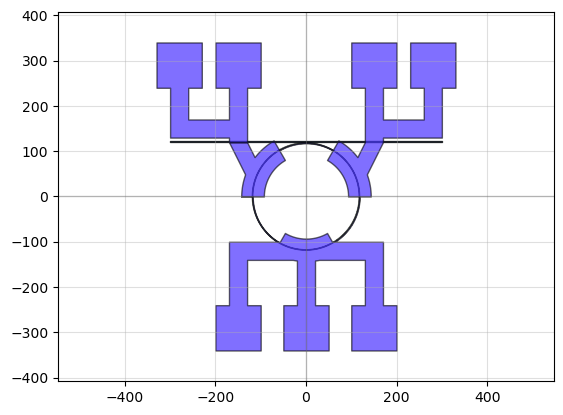

In [23]:
D1= D << pg.union(D, by_layer = True)
qp(D1)

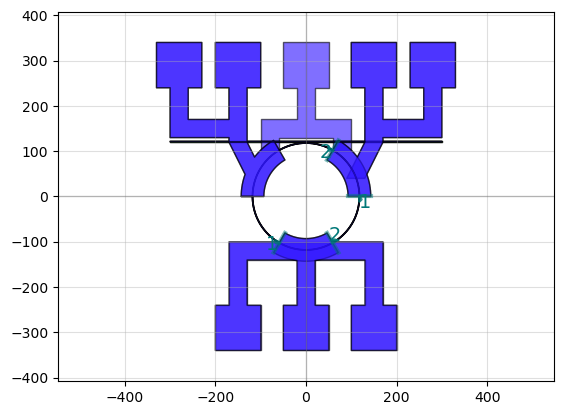

In [24]:
xpts2 = [-100, -100, -20, -20, -50, -50, 50, 50, 20, 20, 100, 100, 60, 60, -60, -60]
ypts2 = [100, 170, 170, 240, 240, 340, 340, 240, 240, 170, 170, 100, 100, 130, 130, 100]
part4 = D.add_polygon([xpts2, ypts2], layer = 1)
qp(D)

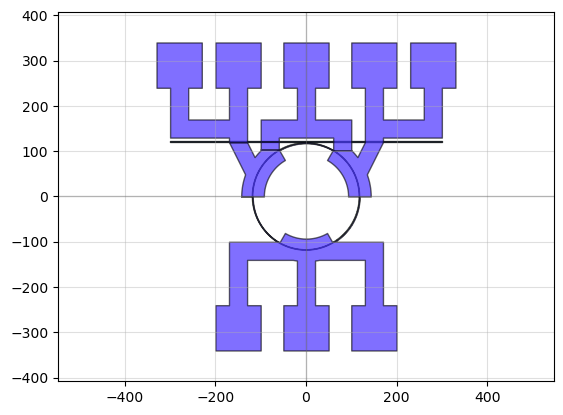

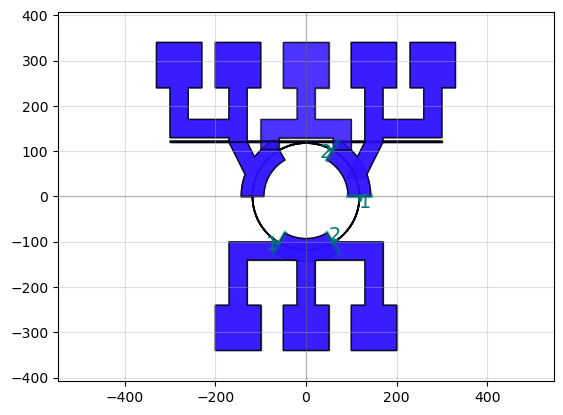

In [25]:
D1= D << pg.union(D, by_layer = True)
qp(D1)
qp(D)

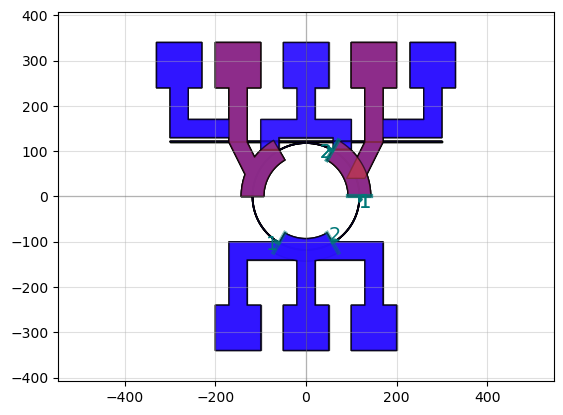

In [26]:
A2 = D << pg.arc(radius = 118, width = 50, theta = 60, layer = 2)
xpts3 = [130, 130, 100, 100, 200, 200, 170, 170, 130, 90]
ypts3 = [120, 240, 240, 340, 340, 240, 240, 120, 40, 40]
B2 = D.add_polygon([xpts3, ypts3], layer = 2)
#OR = pg.boolean(A, B, operation = 'A+B', precision = 1e-6, num_divisions = [1,1], layer = 2)
D1= D << pg.union(D, by_layer = True)
#part1 = D.add_ref(OR)
part2 = D1.mirror(p1 = [0,0], p2 = [0,350])
layer_2 = pg.extract(D, layers = [2])
qp(D)

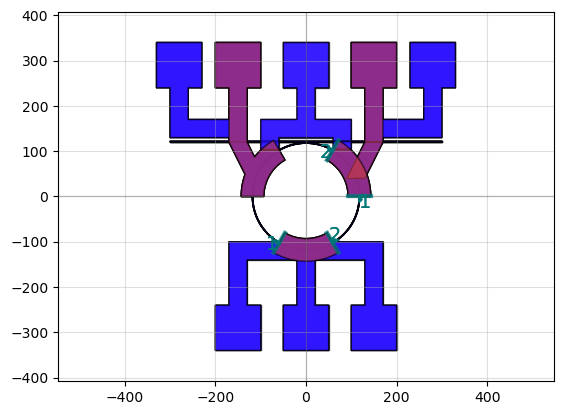

In [27]:
C2 = D.add_ref(pg.arc(radius = 118, width = 50, theta = 60, layer = 2))
C2.rotate(-120)
qp(D)

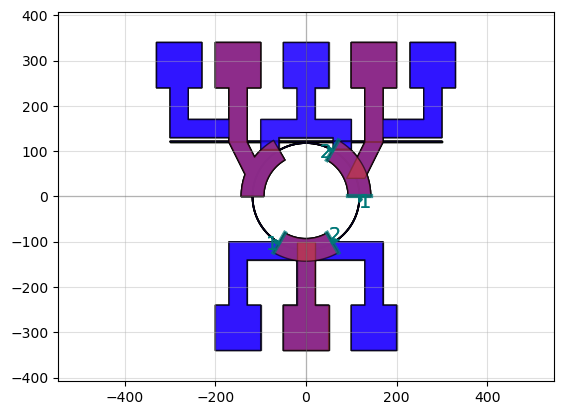

In [28]:
xpts4 = [-20, 20, 20, 50, 50, -50, -50, -20]
ypts4 = [-100, -100, -240, -240, -340, -340, -240, -240]
part3 = D.add_polygon([xpts4, ypts4], layer = 2)
qp(D)

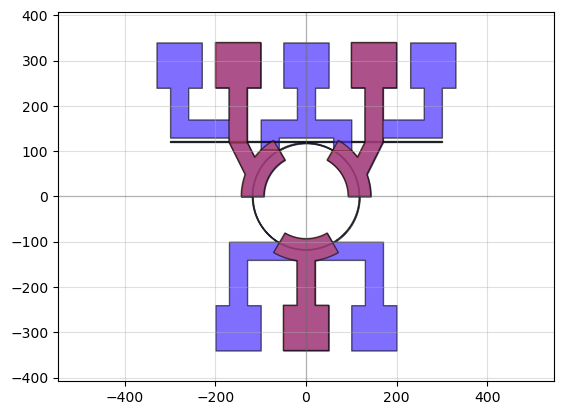

In [29]:
D1= D << pg.union(D, by_layer = True)
qp(D1)

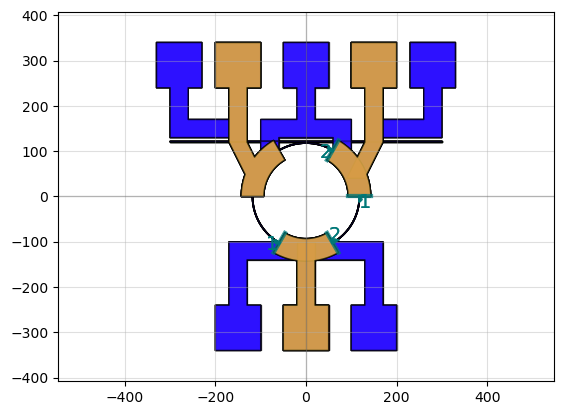

In [30]:
layer_3 = D << pg.copy_layer(D1, layer = 2, new_layer = 3)
qp(D)

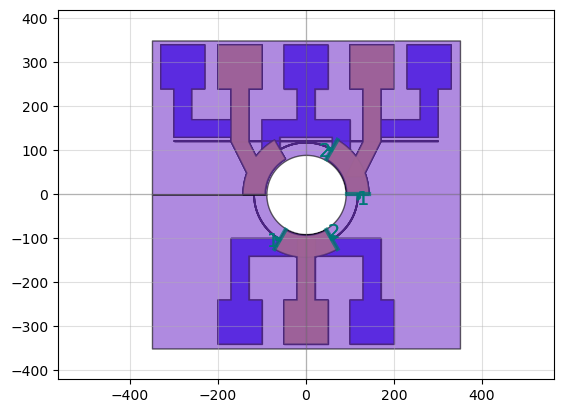

In [31]:
hole = pg.circle(radius = 90, angle_resolution= 2.5, layer= 4)
hole_inverted = D << pg.invert(hole, border = 260, precision = 1e-6, layer = 4)
qp(D)

In [32]:
D.write_gds('myoutput.gds')

'myoutput.gds'

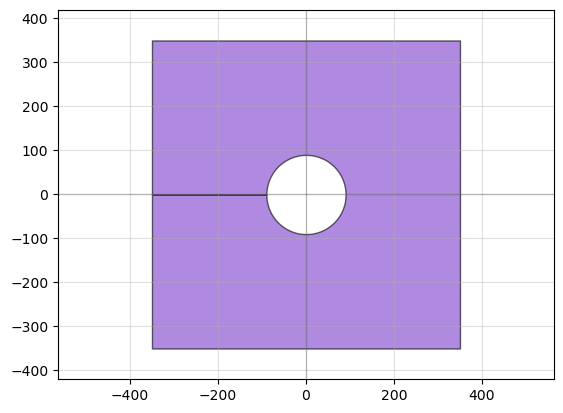

In [33]:
qp(hole_inverted)

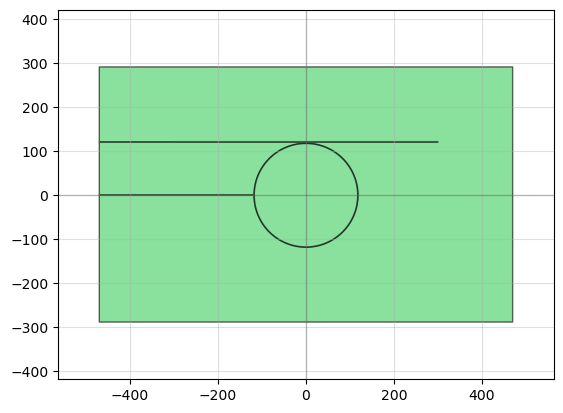

In [34]:
ring_bus = pg.extract(D, layers = [0])
ring_inverted = D << pg.invert(ring_bus, border = 170, precision = 1e-6, layer = 0)
qp(ring_inverted)

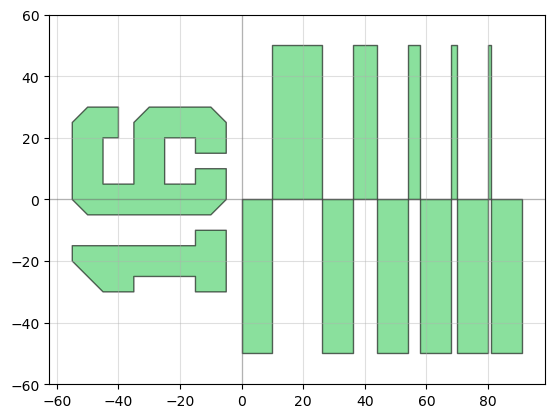

In [35]:
litho = pg.litho_steps(
        line_widths = [1,2,4,8,16],
        line_spacing = 10,
        height = 100,
        layer = 0
        )
qp(litho)

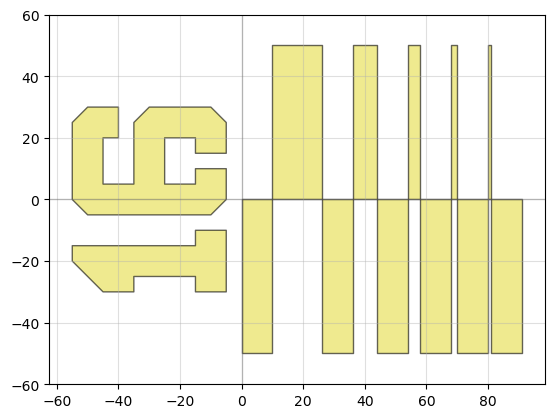

In [38]:
litho1 = pg.litho_steps(
        line_widths = [1,2,4,8,16],
        line_spacing = 10,
        height = 100,
        layer = 3
        )
qp(litho1)

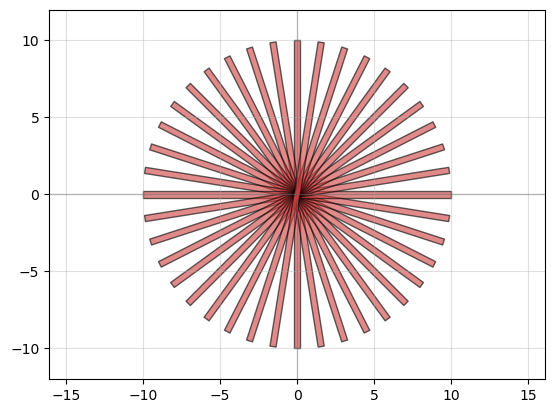

In [41]:
star = pg.litho_star(
        num_lines = 20,
        line_width = 0.4,
        diameter = 20,
        layer = 2
        )
qp(star)